# 1. 라이브러리 임포트

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
import matplotlib.pyplot as plt
import pandas as pd 
import joblib, os

import warnings
import platform
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc 
warnings.filterwarnings('ignore')

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 2. 데이터 로드

사용할 Feature 선택

In [9]:
m = ['content_cnt','content_line', 'img_cnt','... 빈도 수','내돈내산 키워드','쿠팡키워드','ㅠ 빈도 수',
     '광고키워드','단점 빈도 수','ㅠ 빈도 수','광고키워드','단점 빈도 수','이미지광고키워드3','비교 빈도 수',
     '솔직 빈도 수','coupan.ng 키워드','quote_cnt','ㅋㅋㅋㅋ 빈도 수','ㅋ 빈도 수','이미지글없음','이미지광고키워드1',
     '이미지쿠팡키워드1','ㅋㅋ 빈도 수', 'AD_score', 'CP_score', 'PU_score','광고 분류1', '광고 분류2'
]

In [10]:
df = pd.read_csv("Total_Data_5(1).csv")
df = df[m]
df.head(2)

,content_cnt,content_line,img_cnt,... 빈도 수,내돈내산 키워드,쿠팡키워드,ㅠ 빈도 수,광고키워드,단점 빈도 수,ㅠ 빈도 수,...,ㅋ 빈도 수,이미지글없음,이미지광고키워드1,이미지쿠팡키워드1,ㅋㅋ 빈도 수,AD_score,CP_score,PU_score,광고 분류1,광고 분류2
0,617,13,11,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1305,19,19,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


# 3. 데이터 분할

## 3.1 학습용과 테스트 데이터 분할

* 0.3 비율로 분할

In [11]:
XX_train, X_test, yy_train, y_test = train_test_split(df.drop(["광고 분류1","광고 분류2"],axis=1),df["광고 분류2"], test_size=0.3, random_state=42, stratify= df["광고 분류2"] )

## 3.2 학습용과 검증용 데이터 분할
* 0.2 비율로 분할

In [12]:
x_train, x_val, y_train, y_val= train_test_split(XX_train, yy_train, test_size=0.2, random_state=42, stratify= yy_train)

# 4. 모델링
## 4.1 다중 분류 모델링

### 4.1.1 모델 선언

In [13]:
result = {}
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =3,random_state=42)

### 4.1.2 교차 검증

In [14]:
dt_score = cross_val_score(dt_model,x_train,y_train,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train.values,y_train,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

[11:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

,DT,Rf,lg,XGB
0,0.829365,0.898768,0.830071,0.880689


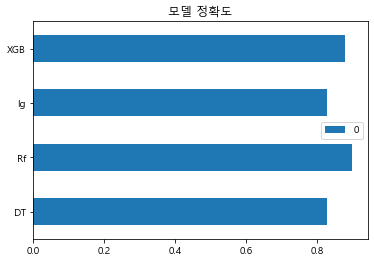

In [15]:
pd.DataFrame(result).T.plot(kind="barh",title="모델 정확도");
display(pd.DataFrame(result))

이전에 비해서 약간 0.03 ~ 0.05정도 상승하였다

### 4.1.3 검증용 데이터셋 평가

In [16]:
xgb_model = XGBClassifier(max_depth =3,random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [17]:
xgb_model.fit(x_train.values,y_train)
rf_model.fit(x_train.values,y_train)

[11:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomForestClassifier(random_state=42)

In [18]:
y_pred_xgb = xgb_model.predict(x_val.values)
y_pred_rf = rf_model.predict(x_val.values)

In [19]:
print("RF")
print(classification_report(y_val, y_pred_rf))

print()
print('---------------------------')
print()
print("XGB")
print(classification_report(y_val, y_pred_xgb))


RF
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       270
           1       0.91      0.40      0.56        25
           2       0.87      0.65      0.74        51

    accuracy                           0.89       346
   macro avg       0.89      0.68      0.74       346
weighted avg       0.89      0.89      0.88       346


---------------------------

XGB
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       270
           1       0.90      0.36      0.51        25
           2       0.83      0.69      0.75        51

    accuracy                           0.89       346
   macro avg       0.88      0.67      0.73       346
weighted avg       0.89      0.89      0.88       346



### 4.1.4 테스트 데이터셋 평가

In [20]:
y_pred_xgb = xgb_model.predict(X_test.values)
y_pred_rf = rf_model.predict(X_test.values)

print("RF")
print(classification_report(y_test, y_pred_rf))

print()
print('---------------------------')
print()
print("XGB")
print(classification_report(y_test, y_pred_xgb))


RF
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       580
           1       0.81      0.64      0.72        53
           2       0.85      0.56      0.67       108

    accuracy                           0.89       741
   macro avg       0.85      0.72      0.77       741
weighted avg       0.89      0.89      0.88       741


---------------------------

XGB
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       580
           1       0.78      0.60      0.68        53
           2       0.82      0.63      0.71       108

    accuracy                           0.89       741
   macro avg       0.84      0.73      0.78       741
weighted avg       0.89      0.89      0.89       741



__결론__

재현율을 평가 측도로 보기로 하였다. 그 측면에서 보았을때 RF보다 XGB가 더 나은 재현율을 보여주고 있기에, 해당 __XGB__ 모델로 선정하기로 한다.

### 4.1.5 모델 저장

In [21]:
os.makedirs("./model/",exist_ok=True)

joblib.dump(xgb_model, './model/xgb_model_v2.0.pkl')

['./model/xgb_model_v2.0.pkl']

## 4.2 이진 분류기 성능 평가

### 4.2.1 y값 이진 값으로 변경

In [22]:
y_train1 = y_train !=0
y_val1 = y_val !=0
y_test1 = y_test !=0

### 4.2.2 최적의 모델 찾기

In [23]:
result = {}
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =4,random_state=42)


In [24]:
dt_score = cross_val_score(dt_model,x_train,y_train1,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train1,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train1,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train.values,y_train1.values,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

[11:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,DT,Rf,lg,XGB
0,0.850322,0.903097,0.851046,0.887906


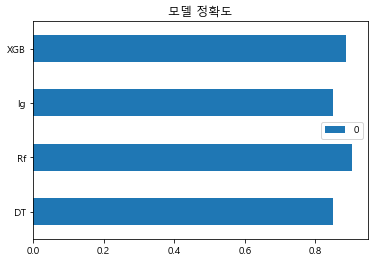

In [25]:
pd.DataFrame(result).T.plot(kind="barh",title="모델 정확도");
display(pd.DataFrame(result))

이진 분류일 경우 0.1 정도 상승하였다.

### 4.2.3 검증용 데이터셋 평가

In [26]:
xgb_model_b = XGBClassifier(max_depth =4,random_state=42)
rf_model_b = RandomForestClassifier(random_state=42)

In [27]:
xgb_model_b.fit(x_train.values,y_train1)
rf_model_b.fit(x_train.values,y_train1)

[11:27:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomForestClassifier(random_state=42)

In [28]:
y_pred_xgb_b = xgb_model_b.predict(x_val.values)
y_pred_rf_b = rf_model_b.predict(x_val.values)

In [29]:
print("RF")
print(classification_report(y_val1, y_pred_rf_b))

print()
print('---------------------------')
print()
print("XGB")
print(classification_report(y_val1, y_pred_xgb_b))


RF
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       270
        True       0.90      0.57      0.69        76

    accuracy                           0.89       346
   macro avg       0.89      0.77      0.81       346
weighted avg       0.89      0.89      0.88       346


---------------------------

XGB
              precision    recall  f1-score   support

       False       0.89      0.97      0.93       270
        True       0.83      0.58      0.68        76

    accuracy                           0.88       346
   macro avg       0.86      0.77      0.80       346
weighted avg       0.88      0.88      0.87       346



### 4.2.4 테스트 데이터셋 평가¶

In [30]:
y_pred_xgb_b = xgb_model_b.predict(X_test.values)
y_pred_rf_b = rf_model_b.predict(X_test.values)

In [31]:
print("RF")
print(classification_report(y_test1, y_pred_rf_b))

print()
print('---------------------------')
print()
print("XGB")
print(classification_report(y_test1, y_pred_xgb_b))


RF
              precision    recall  f1-score   support

       False       0.90      0.97      0.94       580
        True       0.87      0.62      0.72       161

    accuracy                           0.90       741
   macro avg       0.89      0.80      0.83       741
weighted avg       0.90      0.90      0.89       741


---------------------------

XGB
              precision    recall  f1-score   support

       False       0.91      0.96      0.93       580
        True       0.81      0.66      0.73       161

    accuracy                           0.89       741
   macro avg       0.86      0.81      0.83       741
weighted avg       0.89      0.89      0.89       741



In [39]:
confusion_matrix(y_test1, y_pred_xgb_b)

array([[555,  25],
       [ 55, 106]], dtype=int64)

In [40]:
confusion_matrix(y_test1, y_pred_rf_b)

array([[565,  15],
       [ 61, 100]], dtype=int64)

실제가 1을 잘 맞추면 좋은데, 실제 1을 0으로 예측하면 문제이고, 0을 1로 예측하는건 OK -> 즉, 평가 지표를 재현율로 측정해야한다.

__결론__

최종 모델은 XGB로 결정.

### 4.2.5 모델 저장

In [41]:
joblib.dump(xgb_model_b, './model/xgb_model_binary_v2.0.pkl')
joblib.dump(rf_model_b, './model/rf_model_binary_v2.0.pkl')

['./model/rf_model_binary_v2.0.pkl']

# 5. 기여도 알아보기

## 5.1 Shap value를 이용한 XAI

* https://www.kaggle.com/code/vikumsw/explaining-random-forest-model-with-shapely-values/notebook
* https://aigerimshopenova.medium.com/random-forest-classifier-and-shap-how-to-understand-your-customers-and-interpret-a-black-box-model-6166d86820d9

In [130]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgb_model_b)

In [133]:
shap_values = explainer.shap_values(x_train.values, approximate=False, check_additivity=False)

In [162]:
%matplotlib inline

실제 y 값 : 0  예측값 : False  (1 : 광고, 0 : 순수)


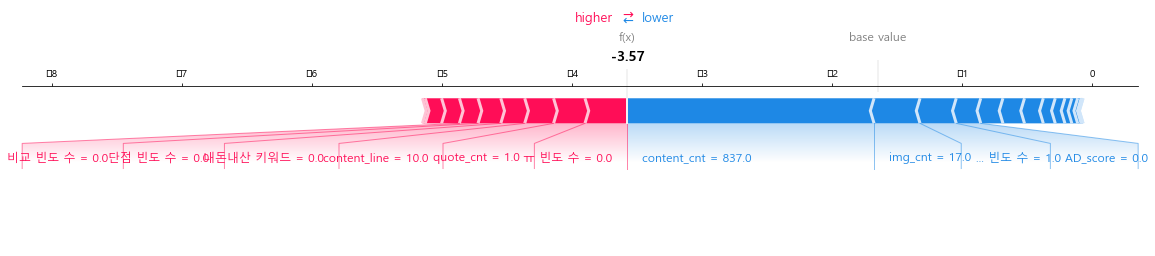

In [166]:
idx = 2
print(f"실제 y 값 : {y_train.values[idx]}  예측값 : {y_pred[idx]}  (1 : 광고, 0 : 순수)")
shap.force_plot(explainer.expected_value,
               shap_values[idx, :],
               x_train.iloc[idx,:],show=False,matplotlib=True).savefig("dsad.png")


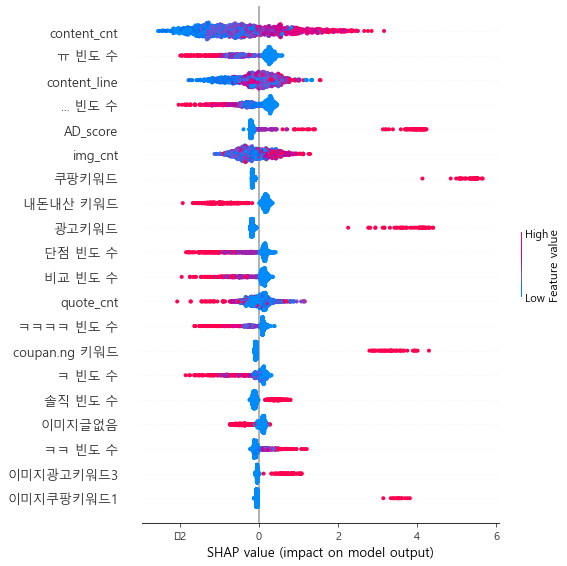

In [139]:
shap.summary_plot(shap_values, x_train,feature_names=list(x_train))

In [140]:
import numpy as np

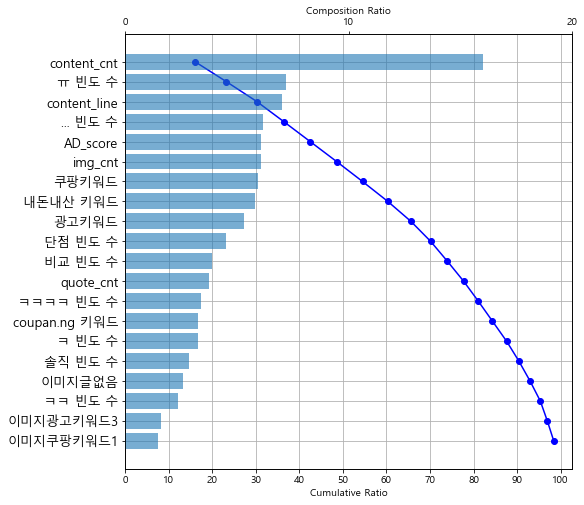

In [156]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    
    # Shap waterfall plot
make_shap_waterfall_plot(shap_values, x_train)

content_cnt가 약 15% 이상 모델을 설명하는데 중요한 변수로 작용하고, 나머지 상위 20 feature로 모델의 90%이상 설명 가능하다.